6763


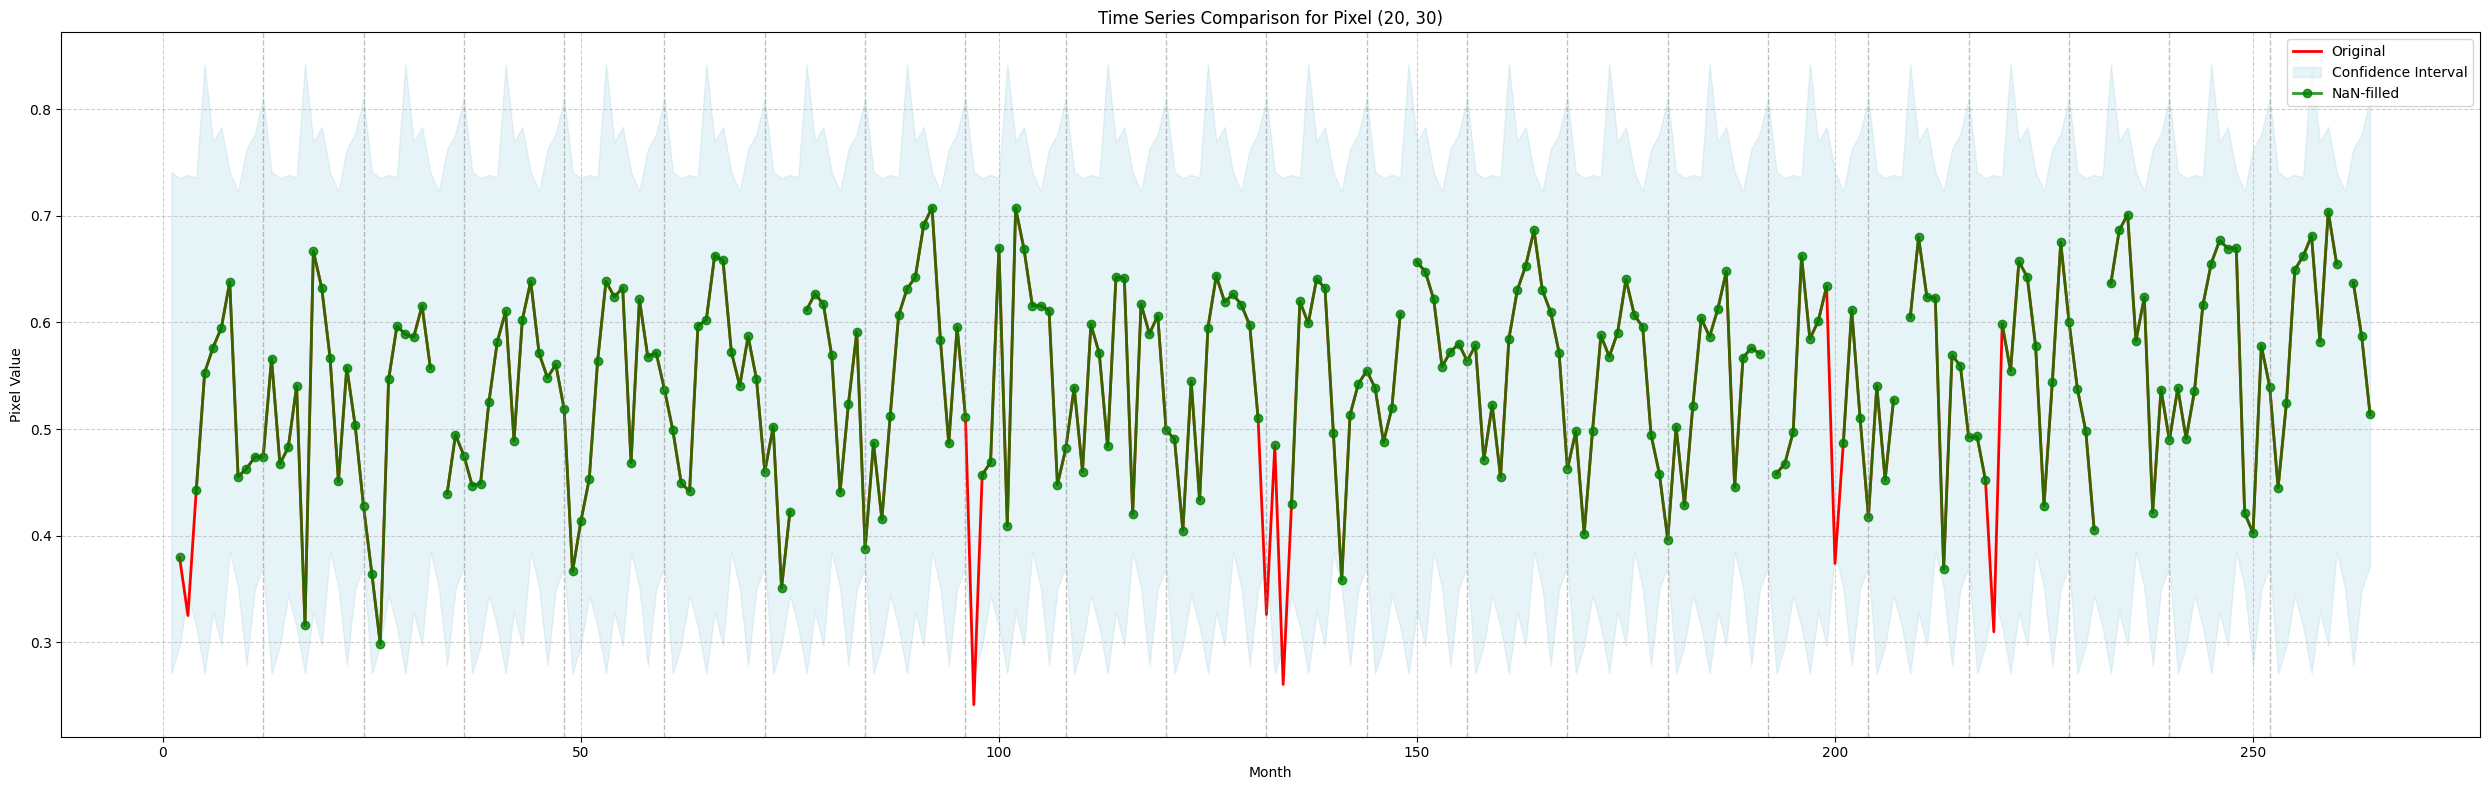

1498


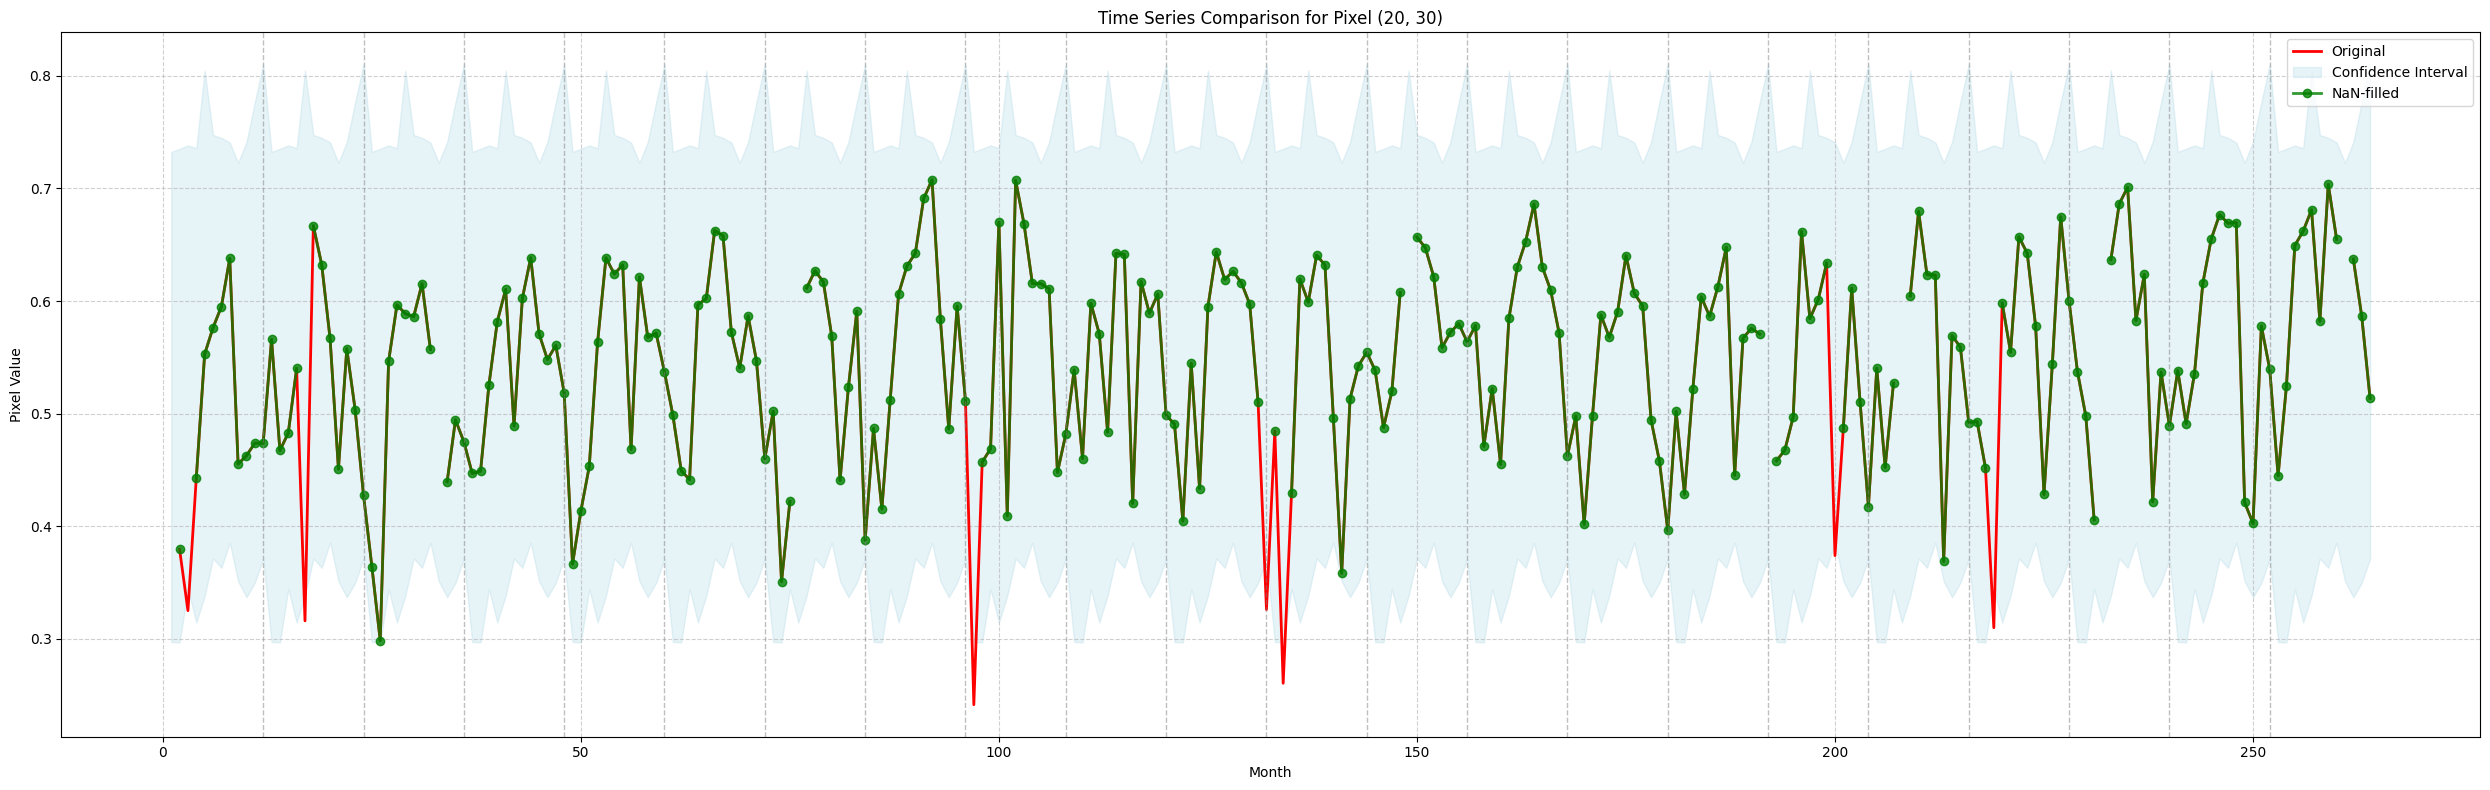

407


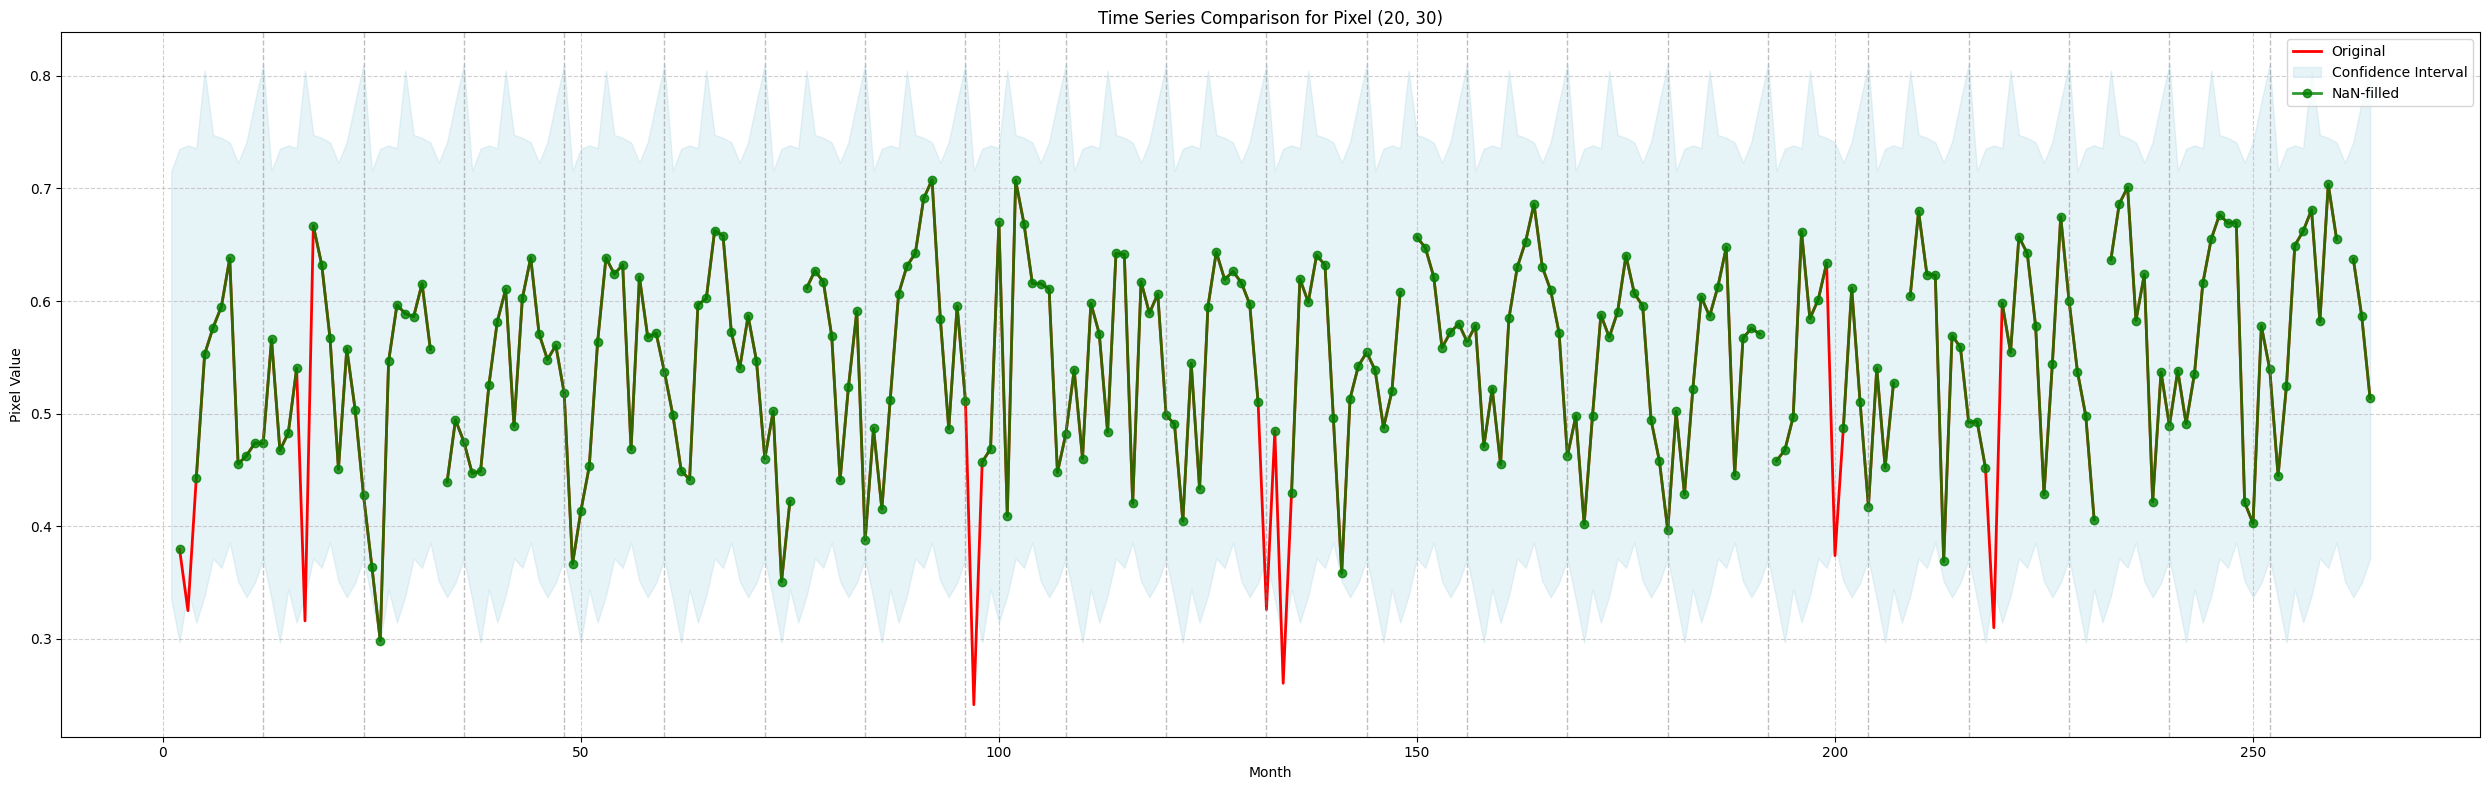

113


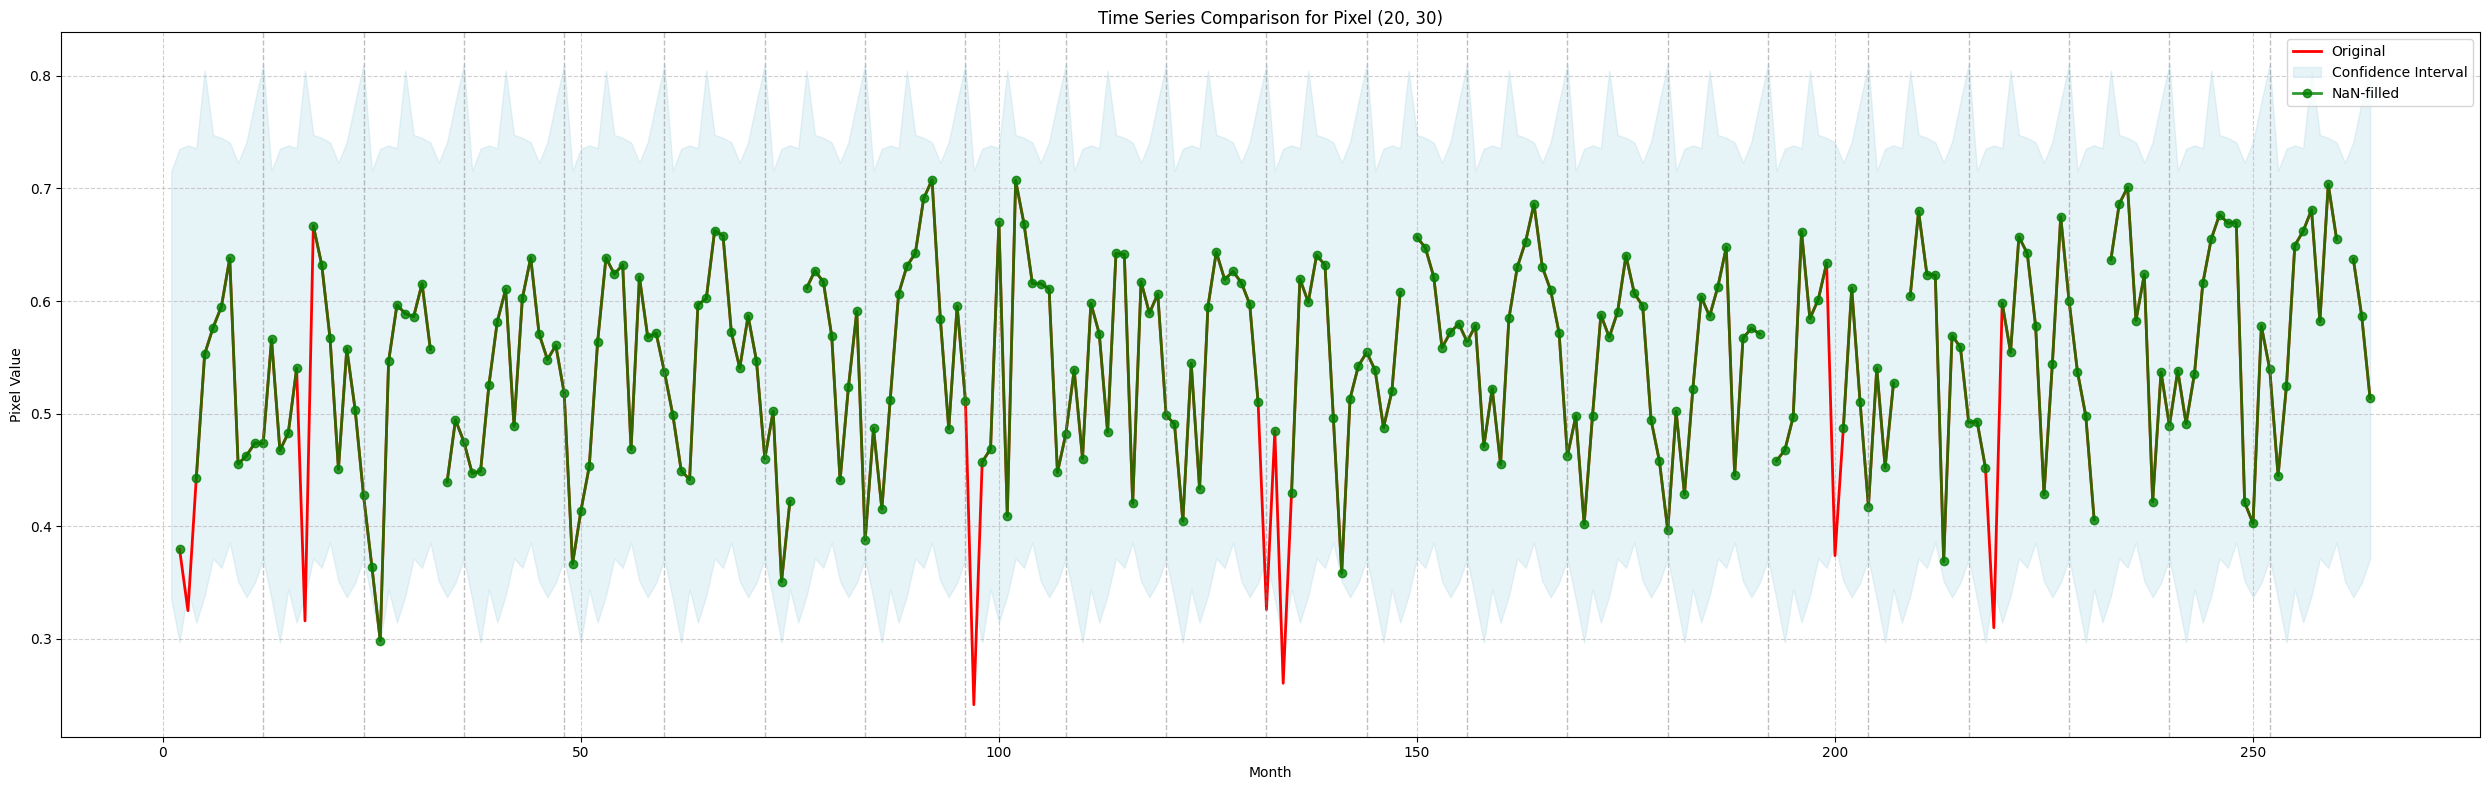

37


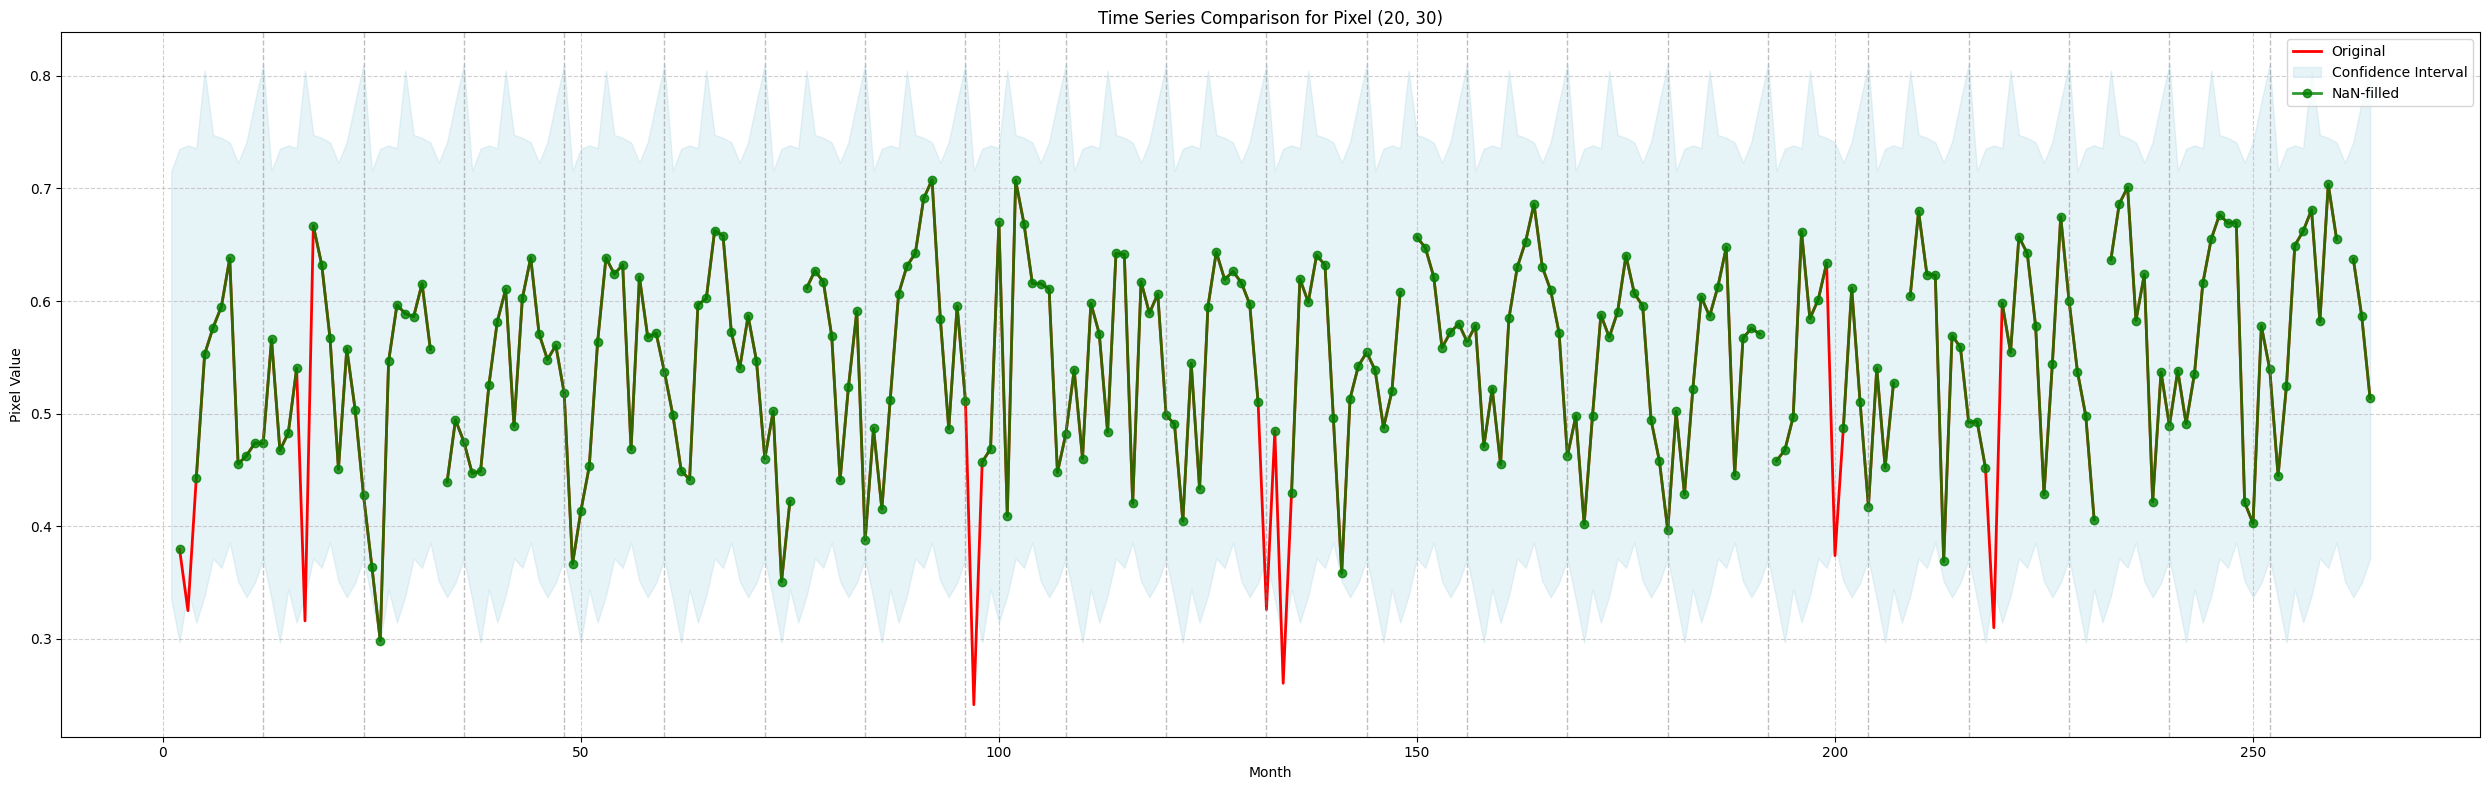

16


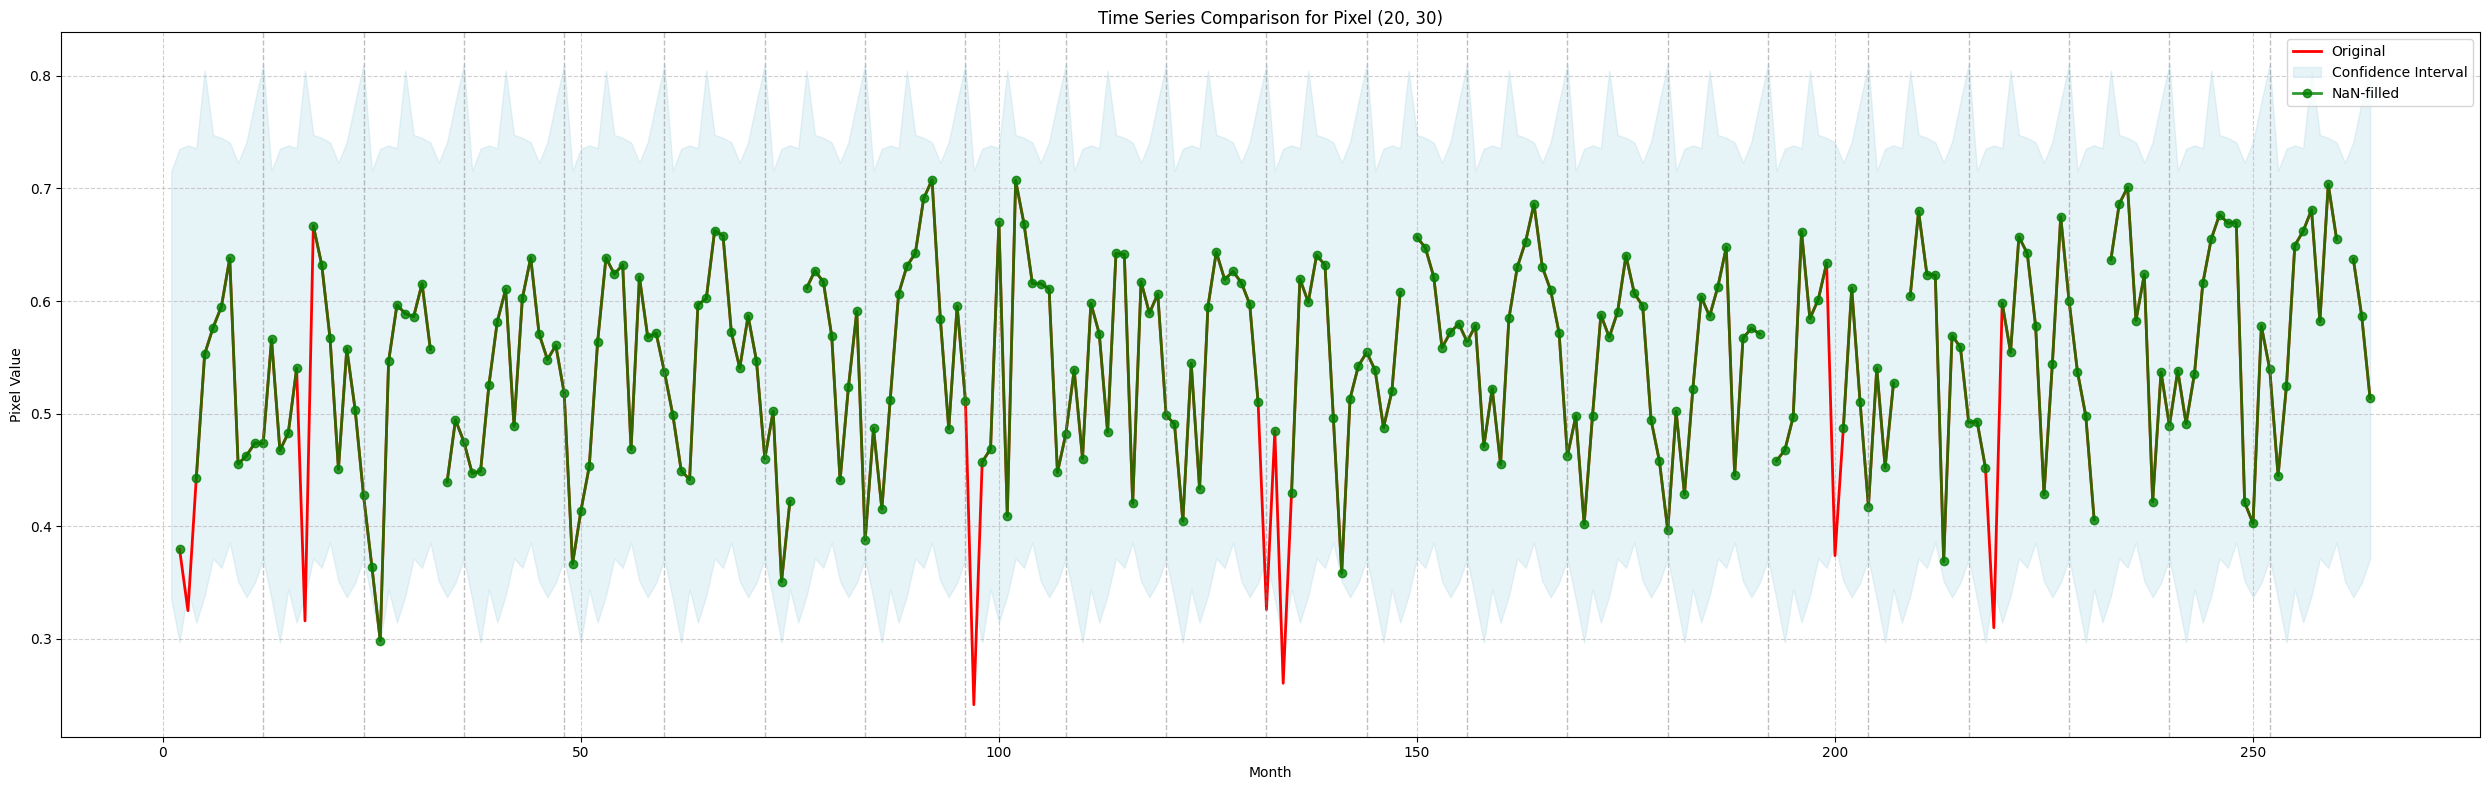

1


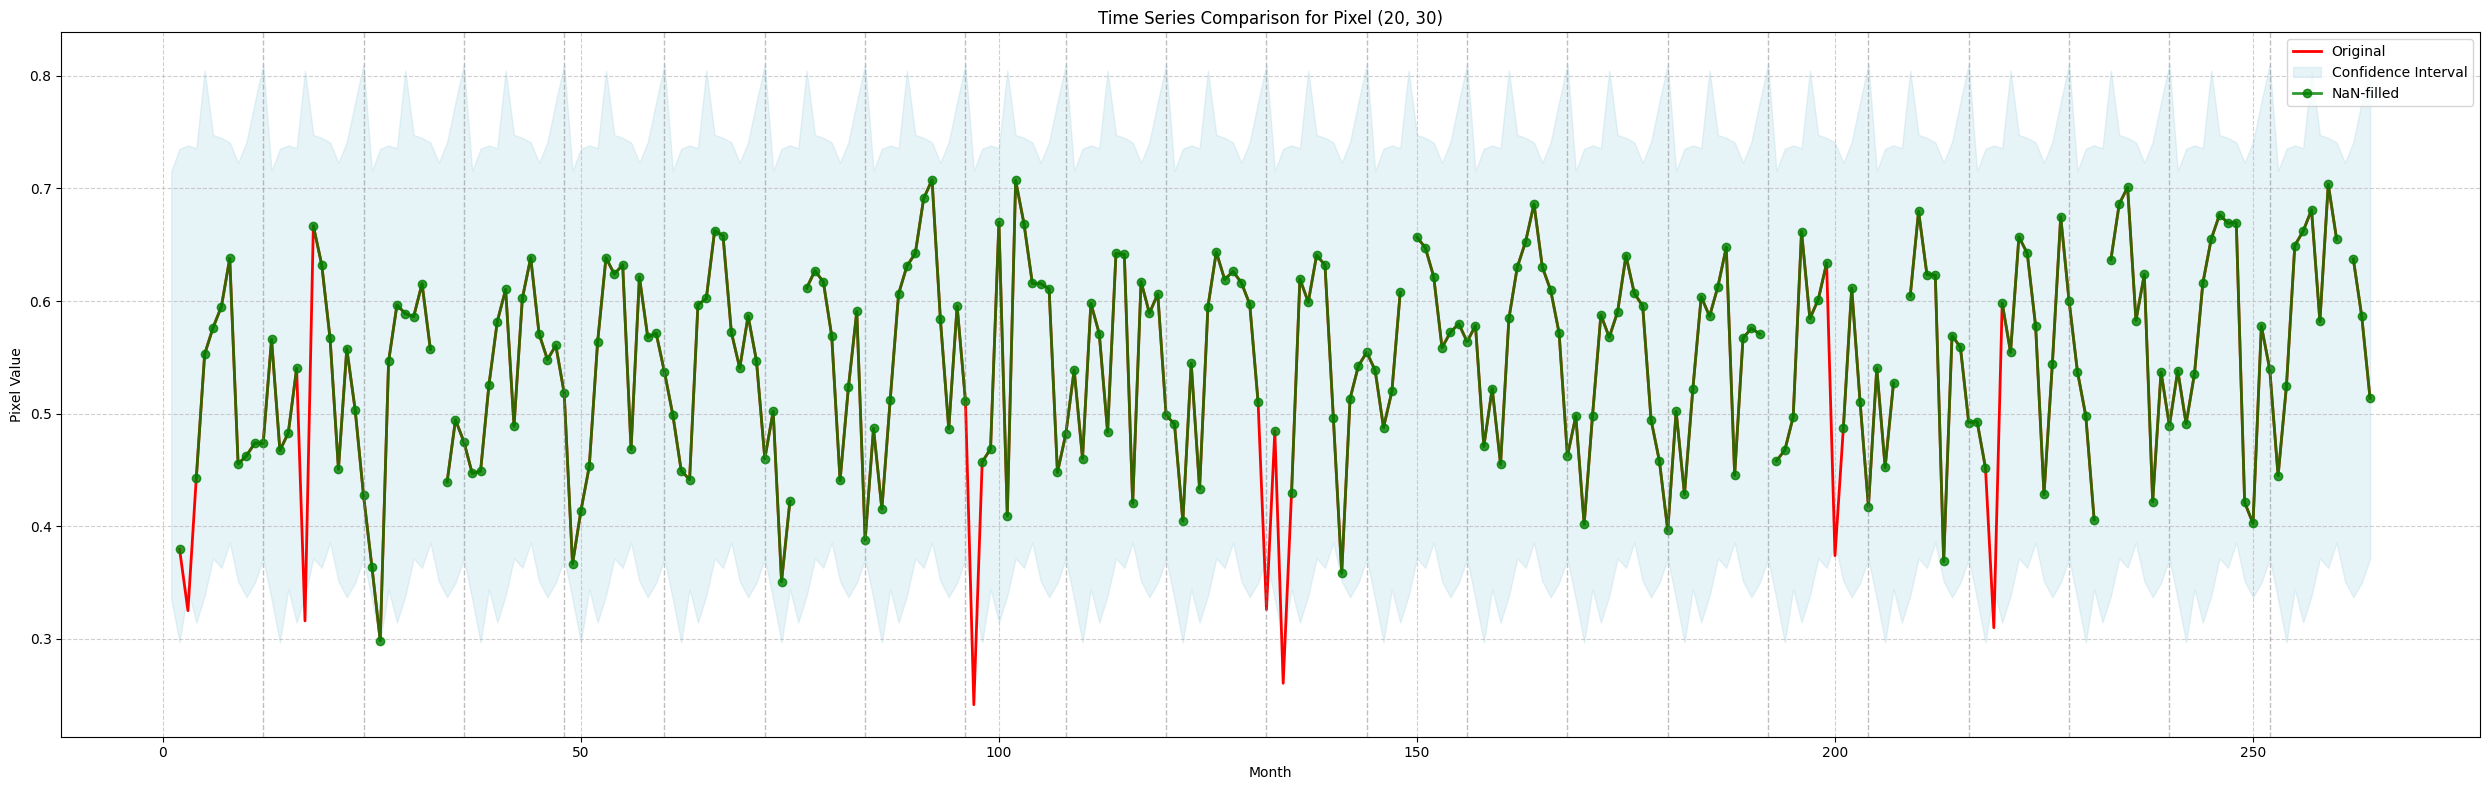

0


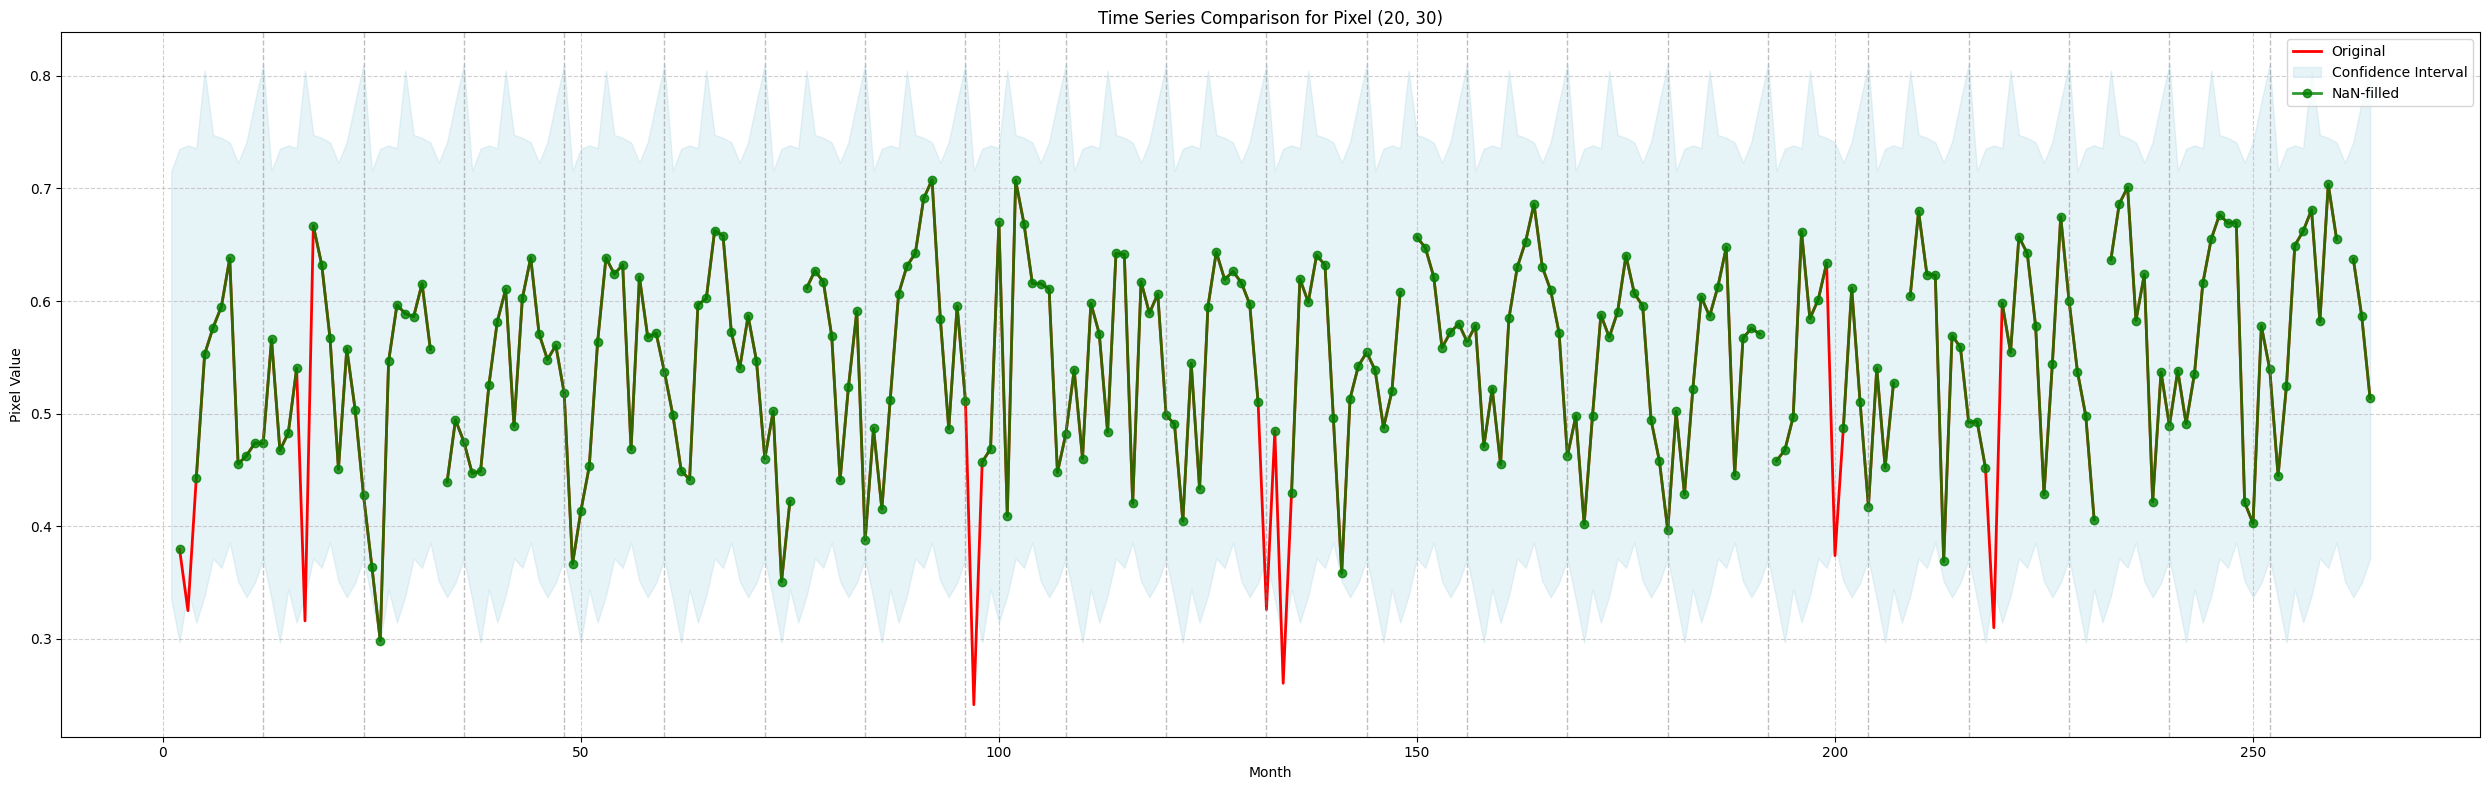

In [ ]:
# Printing each image year wise
import tifffile
import matplotlib.pyplot as plt
import numpy as np



# Replace 'your_image.tif' with the path to your time series satellite image file in TIFF format
image_path = '/content/MODMYD09cloud_EVImax_2000_2022_CLM.tiff'

# Open the TIFF image file
image_stack = tifffile.imread(image_path)


# Create a new image stack with NaN-filled areas
nan_filled_stack = np.copy(image_stack)

dnum=1
#for i in range(2):
while dnum > 0:
  # Reshape the image_stack to have dimensions (height, width, 12, 22)
  num_nan = np.sum(np.isnan(nan_filled_stack))
  reshaped_stack = nan_filled_stack.reshape((nan_filled_stack.shape[0], nan_filled_stack.shape[1], 12, -1))

  # Get the number of time steps (months)
  num_time_steps = image_stack.shape[2]

  # Calculate the mean for each pixel and each month, ignoring NaN values
  mean_values_month_wise = np.nanmean(reshaped_stack, axis=3)

  # Calculate the standard deviation for each pixel and each month, ignoring NaN values
  std_values_month_wise = np.nanstd(reshaped_stack, axis=3)

  #import numpy as np
  import matplotlib.pyplot as plt

  # Choose a specific pixel location (replace these with the coordinates of the pixel you're interested in)
  #for pixel_row in range(45):
  #  for pixel_col in range(43):
  # Calculate total number of months in the original time series
  total_months = image_stack.shape[2]

  # Calculate total number of years
  num_years = total_months // 12

  # Extract the mean and SD time series for the chosen pixel
  #mean_pixel_values = mean_values_month_wise[pixel_row, pixel_col, :]

  # Repeat mean values for each month and each year to match the shape of image_stack
  mean_pixel_values = np.tile(mean_values_month_wise, (1,1,num_years))

  # Repeat std values for each month to match the shape of image_stack
  # std_pixel_values = np.repeat(std_values_month_wise[pixel_row, pixel_col, :], num_years)
  std_pixel_values = np.tile(std_values_month_wise, (1,1,num_years))

  # Calculate upper and lower bounds
  upper_bound = mean_pixel_values + 2.5*std_pixel_values
  lower_bound = mean_pixel_values - 2.5*std_pixel_values

  # Identify values outside the confidence interval and set them to NaN in the new image stack
  outside_interval = (nan_filled_stack > upper_bound) | (nan_filled_stack < lower_bound)
  nan_filled_stack[outside_interval] = np.nan
  num_nan2 = np.sum(np.isnan(nan_filled_stack))
  dnum = num_nan2 - num_nan
  print(dnum)
  pixel_row, pixel_col = 20,30
  # Plot the original time series, the mean, and the NaN-filled areas on the same graph
  plt.figure(figsize=(25, 8))

  # Plot original time series in red
  plt.plot(np.arange(1, num_time_steps + 1), image_stack[pixel_row, pixel_col, :], linestyle='-', color='red', label='Original', linewidth=2)

  plt.fill_between(np.arange(1, num_time_steps + 1), upper_bound[pixel_row, pixel_col, :], lower_bound[pixel_row, pixel_col, :], color='lightblue', alpha=0.3, label='Confidence Interval')

  # Plot NaN-filled areas in green
  plt.plot(np.arange(1, num_time_steps + 1), nan_filled_stack[pixel_row, pixel_col, :], linestyle='-',marker='o', color='green', label='NaN-filled', alpha=0.8, linewidth=2)


  # Add vertical grid lines at the beginning of each year
  for year_start in range(12, num_time_steps, 12):
      plt.axvline(year_start, color='gray', linestyle='--', linewidth=1, alpha=0.5)

  plt.title(f'Time Series Comparison for Pixel ({pixel_row}, {pixel_col})')
  plt.xlabel('Month')
  plt.ylabel('Pixel Value')
  plt.grid(True, linestyle="--", alpha=0.6)
  plt.legend()
  plt.tight_layout()
  plt.show()


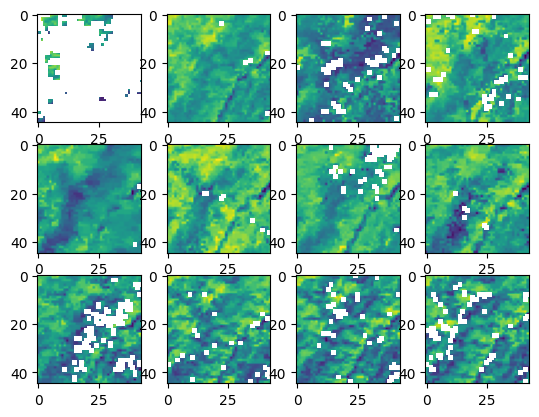

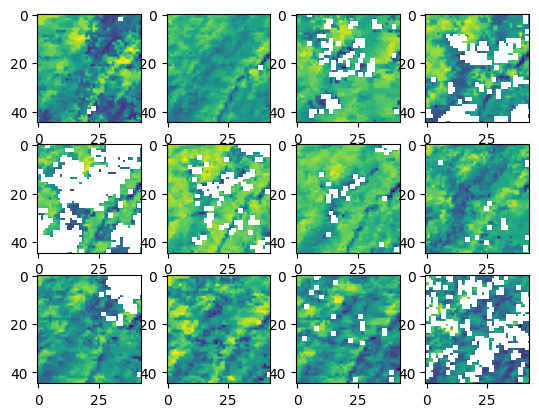

In [ ]:
for year in range(2):
  fig, ax = plt.subplots(nrows=3, ncols=4)
  for month, ax2 in enumerate(ax.flat):
     ax2.imshow(nan_filled_stack[:, :, year*12+month], cmap='viridis')

plt.show()


In [ ]:
import numpy as np

# a =np.array([[True,False],[True,True]])
# b =np.array([[True,True],[False,True]])
# c= a&b
# d=np.array([[1.,2],[3,4]])
# d[c]=np.nan
# print(c)
# print(d)

x = np.array([[[1,2],[3,4]]])
print(x.shape)
b=np.tile(x, (2,2,2))
print(b)
print(b.shape)

(1, 2, 2)
[[[1 2 1 2]
  [3 4 3 4]
  [1 2 1 2]
  [3 4 3 4]]

 [[1 2 1 2]
  [3 4 3 4]
  [1 2 1 2]
  [3 4 3 4]]]
(2, 4, 4)


save 22 figures (labels the year)
save nan_fill_stack so we load directly (use pickle)

the number of nan of each month (plot this time series)

In [ ]:
from google.colab import drive
import pickle


drive.mount('/content/gdrive')

# Save the array to Google Drive
with open('/content/gdrive/My Drive/nan_filled_stack.pkl', 'wb') as file:
    pickle.dump(nan_filled_stack, file)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
with open('/content/gdrive/My Drive/nan_filled_stack.pkl', 'rb') as file:
    loaded_array = pickle.load(file)

loaded_array

array([[[0.4953363 , 0.48561648, 0.5079341 , ..., 0.6188102 ,
         0.6427947 , 0.5323816 ],
        [0.4953363 , 0.49871695, 0.49477968, ..., 0.6188102 ,
         0.6427947 , 0.5323816 ],
        [       nan, 0.5121164 , 0.49477968, ..., 0.6202994 ,
         0.61317843, 0.48943716],
        ...,
        [       nan, 0.34410003, 0.29497465, ...,        nan,
         0.51259154, 0.37609905],
        [       nan, 0.35888597, 0.31742176, ...,        nan,
         0.59628737, 0.40528032],
        [       nan, 0.36278763, 0.32426906, ..., 0.61098063,
         0.59628737, 0.40528032]],

       [[       nan, 0.48561648, 0.44940144, ..., 0.6672579 ,
         0.69644374, 0.5075408 ],
        [0.4558664 , 0.4972919 , 0.49093825, ..., 0.61626744,
         0.6255385 , 0.55707294],
        [0.4558664 , 0.4972919 , 0.5008695 , ..., 0.61626744,
         0.61317843, 0.498337  ],
        ...,
        [       nan, 0.34701684, 0.2826997 , ..., 0.5366074 ,
         0.55528086,        nan],
        [   

**Saveing the nan_filled_stack images **

In [ ]:
import calendar
import matplotlib.pyplot as plt
import numpy as np

# Create lists of month names and year names
month_names = list(calendar.month_name)[1:]  # Exclude the empty first element
year_names = [str(2001 + year) for year in range(22)]


# Loop over years
for year in range(22):
    fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(12, 9))

    # Loop over months
    for month, ax2 in enumerate(ax.flat):
        ax2.imshow(nan_filled_stack[:, :, year * 12 + month], cmap='viridis')
        ax2.set_title(month_names[month])

    # Add a common title for the entire subplot
    fig.suptitle(f'Year {year_names[year]}', fontsize=16)

    # Save the figure with a filename that includes the year
    file_path = f'/content/year_{year_names[year]}_visualization.png'
    plt.savefig(file_path)
    plt.close()  # Close the figure to avoid displaying in the notebook

**Counting the number of nan in the final nan_filled_stack **

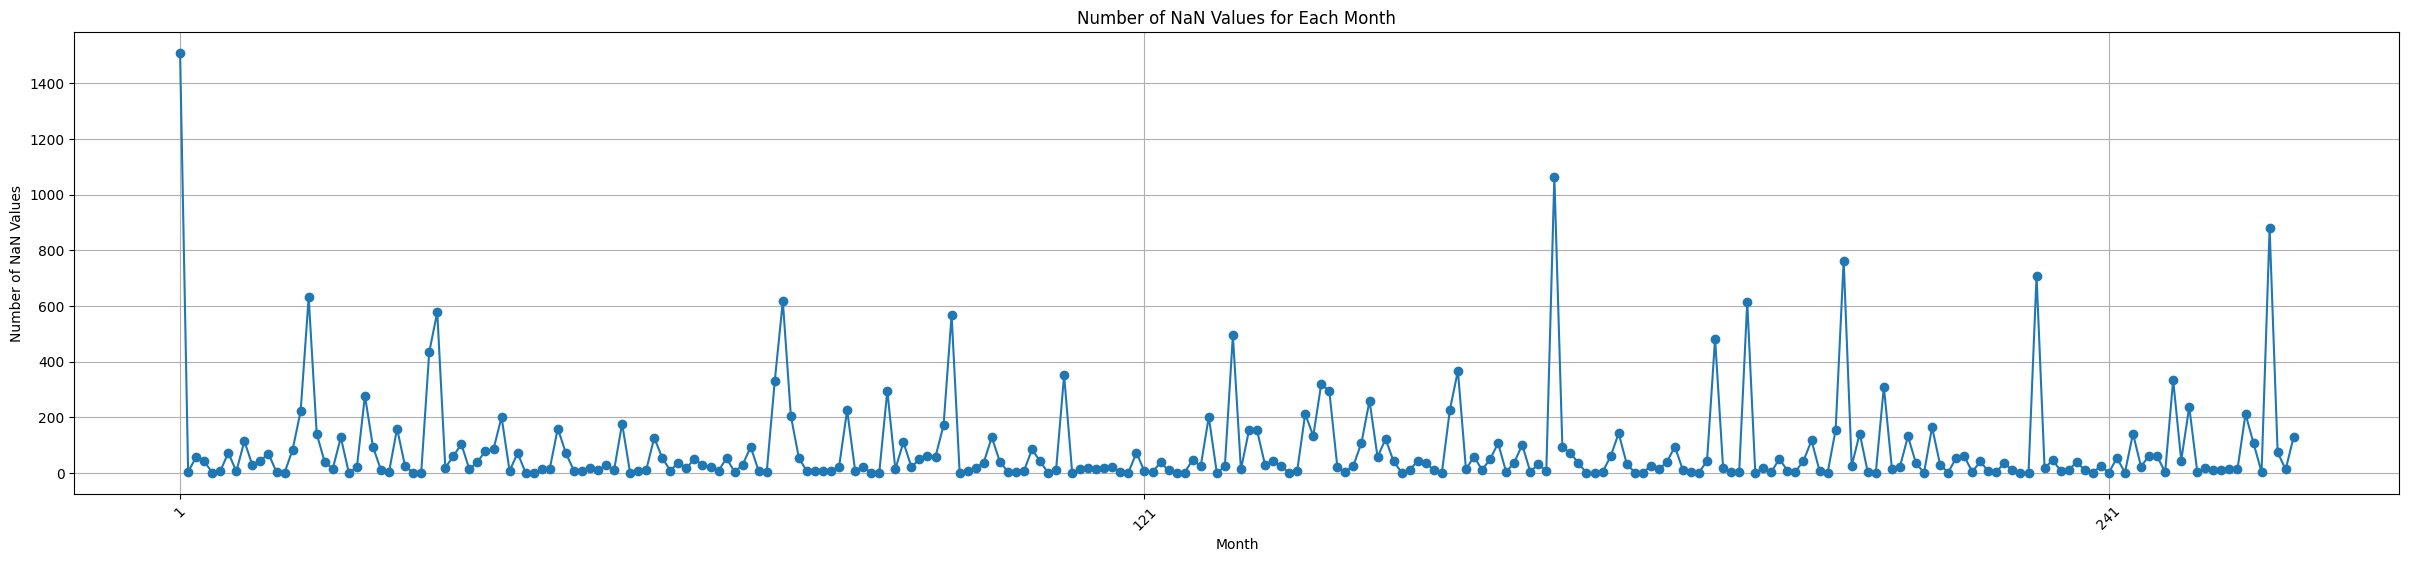

In [ ]:
# Reshape nan_filled_stack for easier calculation
reshaped_stack = np.reshape(nan_filled_stack, (45 * 43, 264))

# Count the number of NaN values for each month
nan_counts_per_month = np.sum(np.isnan(reshaped_stack), axis=0)

# Increase the length of the x-axis
months = np.arange(1, 265)

# Set the figure size
fig, ax = plt.subplots(figsize=(30, 6))

# Plot the results
ax.plot(months, nan_counts_per_month, marker='o')
ax.set_title('Number of NaN Values for Each Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of NaN Values')
ax.grid(True)

# Optionally, set the x-axis ticks for better readability
plt.xticks(np.arange(1, 265, step=120), rotation=45)  # Adjust the step based on your preference

plt.show()

In [ ]:
image_stack = tifffile.imread(image_path)

nan_filled_stack = np.copy(image_stack)

dnum = 1
while dnum > 0:
    num_nan = np.sum(np.isnan(nan_filled_stack))
    reshaped_stack = nan_filled_stack.reshape((nan_filled_stack.shape[0], nan_filled_stack.shape[1], 12, -1))

    num_time_steps = image_stack.shape[2]

    mean_values_month_wise = np.nanmean(reshaped_stack, axis=3)
    std_values_month_wise = np.nanstd(reshaped_stack, axis=3)

    total_months = image_stack.shape[2]
    num_years = total_months // 12

    mean_pixel_values = np.tile(mean_values_month_wise, (1, 1, num_years))
    std_pixel_values = np.tile(std_values_month_wise, (1, 1, num_years))

    upper_bound = mean_pixel_values + 2.5 * std_pixel_values
    lower_bound = mean_pixel_values - 2.5 * std_pixel_values

    outside_interval = (nan_filled_stack > upper_bound) | (nan_filled_stack < lower_bound)
    nan_filled_stack[outside_interval] = np.nan
    num_nan2 = np.sum(np.isnan(nan_filled_stack))
    dnum = num_nan2 - num_nan
    print(dnum)
    pixel_row, pixel_col = 20, 30

    plt.figure(figsize=(25, 8))

    plt.plot(np.arange(1, num_time_steps + 1), image_stack[pixel_row, pixel_col, :], linestyle='-', color='red', label='Original', linewidth=2)

    plt.fill_between(np.arange(1, num_time_steps + 1), upper_bound[pixel_row, pixel_col, :], lower_bound[pixel_row, pixel_col, :], color='lightblue', alpha=0.3, label='Confidence Interval')

    plt.plot(np.arange(1, num_time_steps + 1), nan_filled_stack[pixel_row, pixel_col, :], linestyle='-', marker='o', color='green', label='NaN-filled', alpha=0.8, linewidth=2)

    for year_start in range(12, num_time_steps, 12):
        plt.axvline(year_start, color='gray', linestyle='--', linewidth=1, alpha=0.5)

    plt.title(f'Time Series Comparison for Pixel ({pixel_row}, {pixel_col})')
    plt.xlabel('Month')
    plt.ylabel('Pixel Value')
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()